This notebook plot figure for HGDP

In [71]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
import phate
import umap
import scprep
from sklearn.preprocessing import LabelEncoder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add src directory to the Python path
sys.path.append(os.path.join(project_root, "src"))
from HGDP_utils import load_data_HGDP
from dm import DiffusionMap

In [2]:
# define paths
DATA_PATH = "/home/mila/s/shuang.ni/scratch/phate_genetics/data/HGDP+1KGP/V4"
SAVE_PATH = "/home/mila/s/shuang.ni/scratch/phate_genetics/results/HGDP+1KGP"
Figure_PATH = SAVE_PATH + "/figures"
os.makedirs(Figure_PATH, exist_ok=True)

In [3]:
metadata, relatedness, data, mapping_info = load_data_HGDP(DATA_PATH)
cmap_genetic_region, cmap_pop= mapping_info

In [4]:
# filter data
filters = ["filter_pca_outlier", "hard_filtered", "filter_contaminated"]
_filtered_indices = metadata[metadata[filters].any(axis=1)].index
filtered_indices = ~metadata.index.isin(_filtered_indices)
data = data[filtered_indices]
metadata = metadata[filtered_indices]
# get filterted lables
label_genetic_region = metadata['Genetic_region_merged'].values
label_pop = metadata['Population'].values

# filter related samples
related_indices = ~metadata['filter_king_related'].values

to_fit_on = related_indices
to_transform_on = ~related_indices

# fit PCA on unrelated samples and transform on related samples

In [ ]:
pca_obj = sklearn.decomposition.PCA(n_components=50, random_state=42)
pca_obj.fit(data[to_fit_on])
inputs = pca_obj.transform(data)

In [25]:
# save PCA 50D in txt
np.savetxt(SAVE_PATH + "/PCA_50D.txt", inputs)

In [11]:
# load PCA 50D
inputs = np.loadtxt(SAVE_PATH + "/PCA_50D.txt")

# run all methods

## PHATE

In [115]:
phate_op_2d = phate.PHATE(random_state=42, 
                          n_components=2, 
                          knn=100, 
                          t=5, 
                          decay=40,
                          n_pca=None)
phate_op_2d.fit(inputs)
phate_emb_2d = phate_op_2d.transform()

Running PHATE on 4094 observations and 50 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 1.23 seconds.
  Calculating affinities...
  Calculated affinities in 0.31 seconds.
Calculated graph and diffusion operator in 1.59 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.90 seconds.
  Calculating KMeans...
  Calculated KMeans in 2.39 seconds.
Calculated landmark operator in 4.82 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.19 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.46 seconds.


In [116]:
# save PHATE 2D in txt
np.savetxt(SAVE_PATH + "/PHATE_2D.txt", phate_emb_2d)

<Axes: title={'center': 'PHATE'}, xlabel=' ', ylabel=' '>

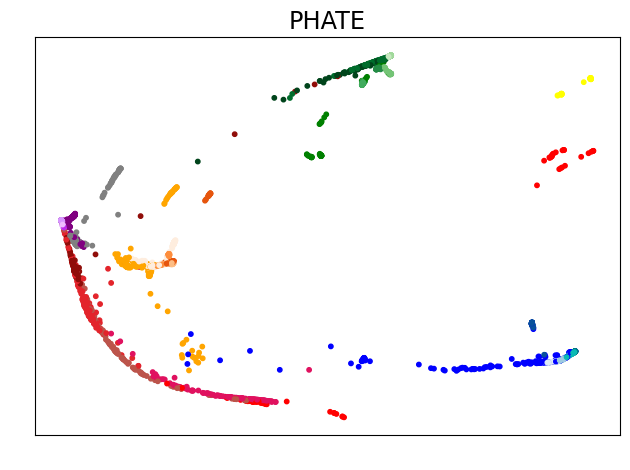

In [178]:
scprep.plot.scatter2d(phate_emb_2d, s=10, 
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='PHATE', fontsize=10)

## UMAP

In [12]:
umap_op_2d = umap.UMAP(n_components=2, n_neighbors=6, min_dist=0.6, random_state=42)
umap_emb_2d = umap_op_2d.fit_transform(inputs)

/home/mila/s/shuang.ni/manifold_genetics/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/mila/s/shuang.ni/manifold_genetics/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [14]:
# save UMAP 2D in txt
np.savetxt(SAVE_PATH + "/UMAP_2D.txt", umap_emb_2d)

<Axes: title={'center': 'UMAP'}, xlabel=' ', ylabel=' '>

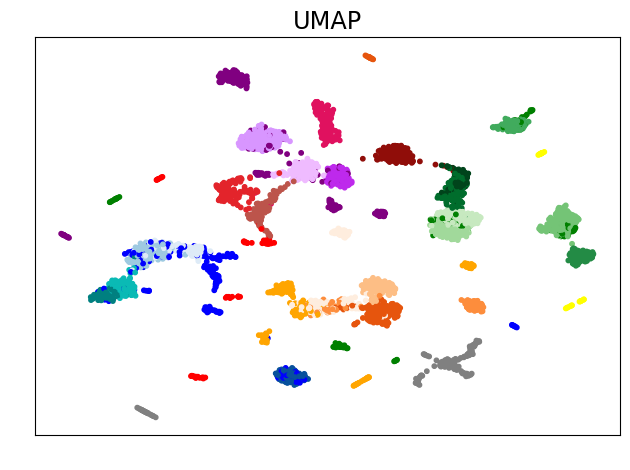

In [34]:
scprep.plot.scatter2d(umap_emb_2d, s=10, 
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='UMAP', fontsize=10)

## t-SNE

In [15]:
tsne_op_2d = TSNE(n_components=2, perplexity=20, n_iter=1000, random_state=42)
tsne_emb_2d = tsne_op_2d.fit_transform(inputs)

In [16]:
# save tSNE 2D in txt
np.savetxt(SAVE_PATH + "/tSNE_2D.txt", tsne_emb_2d)

## diffusion map

In [117]:
# diffusion map embeddings
dm_obj = DiffusionMap(n_components=2, knn=100, t=5)
dm_obj.fit(inputs)
diffusion_emb_2d = dm_obj.transform(inputs)

In [119]:
# save tSNE 2D in txt
np.savetxt(SAVE_PATH + "/diffusion_2D.txt", diffusion_emb_2d)

## repulsion PHATE

In [ ]:
#repulsion PHATE

# load 2D embeddings from saved

In [120]:
# load embeddings from txt
inputs = np.loadtxt(SAVE_PATH + "/PCA_50D.txt")
phate_emb_2d = np.loadtxt(SAVE_PATH + "/PHATE_2D.txt")
umap_emb_2d = np.loadtxt(SAVE_PATH + "/UMAP_2D.txt")
tsne_emb_2d = np.loadtxt(SAVE_PATH + "/tSNE_2D.txt")
diffusion_emb_2d = np.loadtxt(SAVE_PATH + "/diffusion_2D.txt")
repulsion_emb_2d = np.loadtxt(SAVE_PATH + "/PHATE_2D.txt")


# plot populations

## plot 4 methods

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


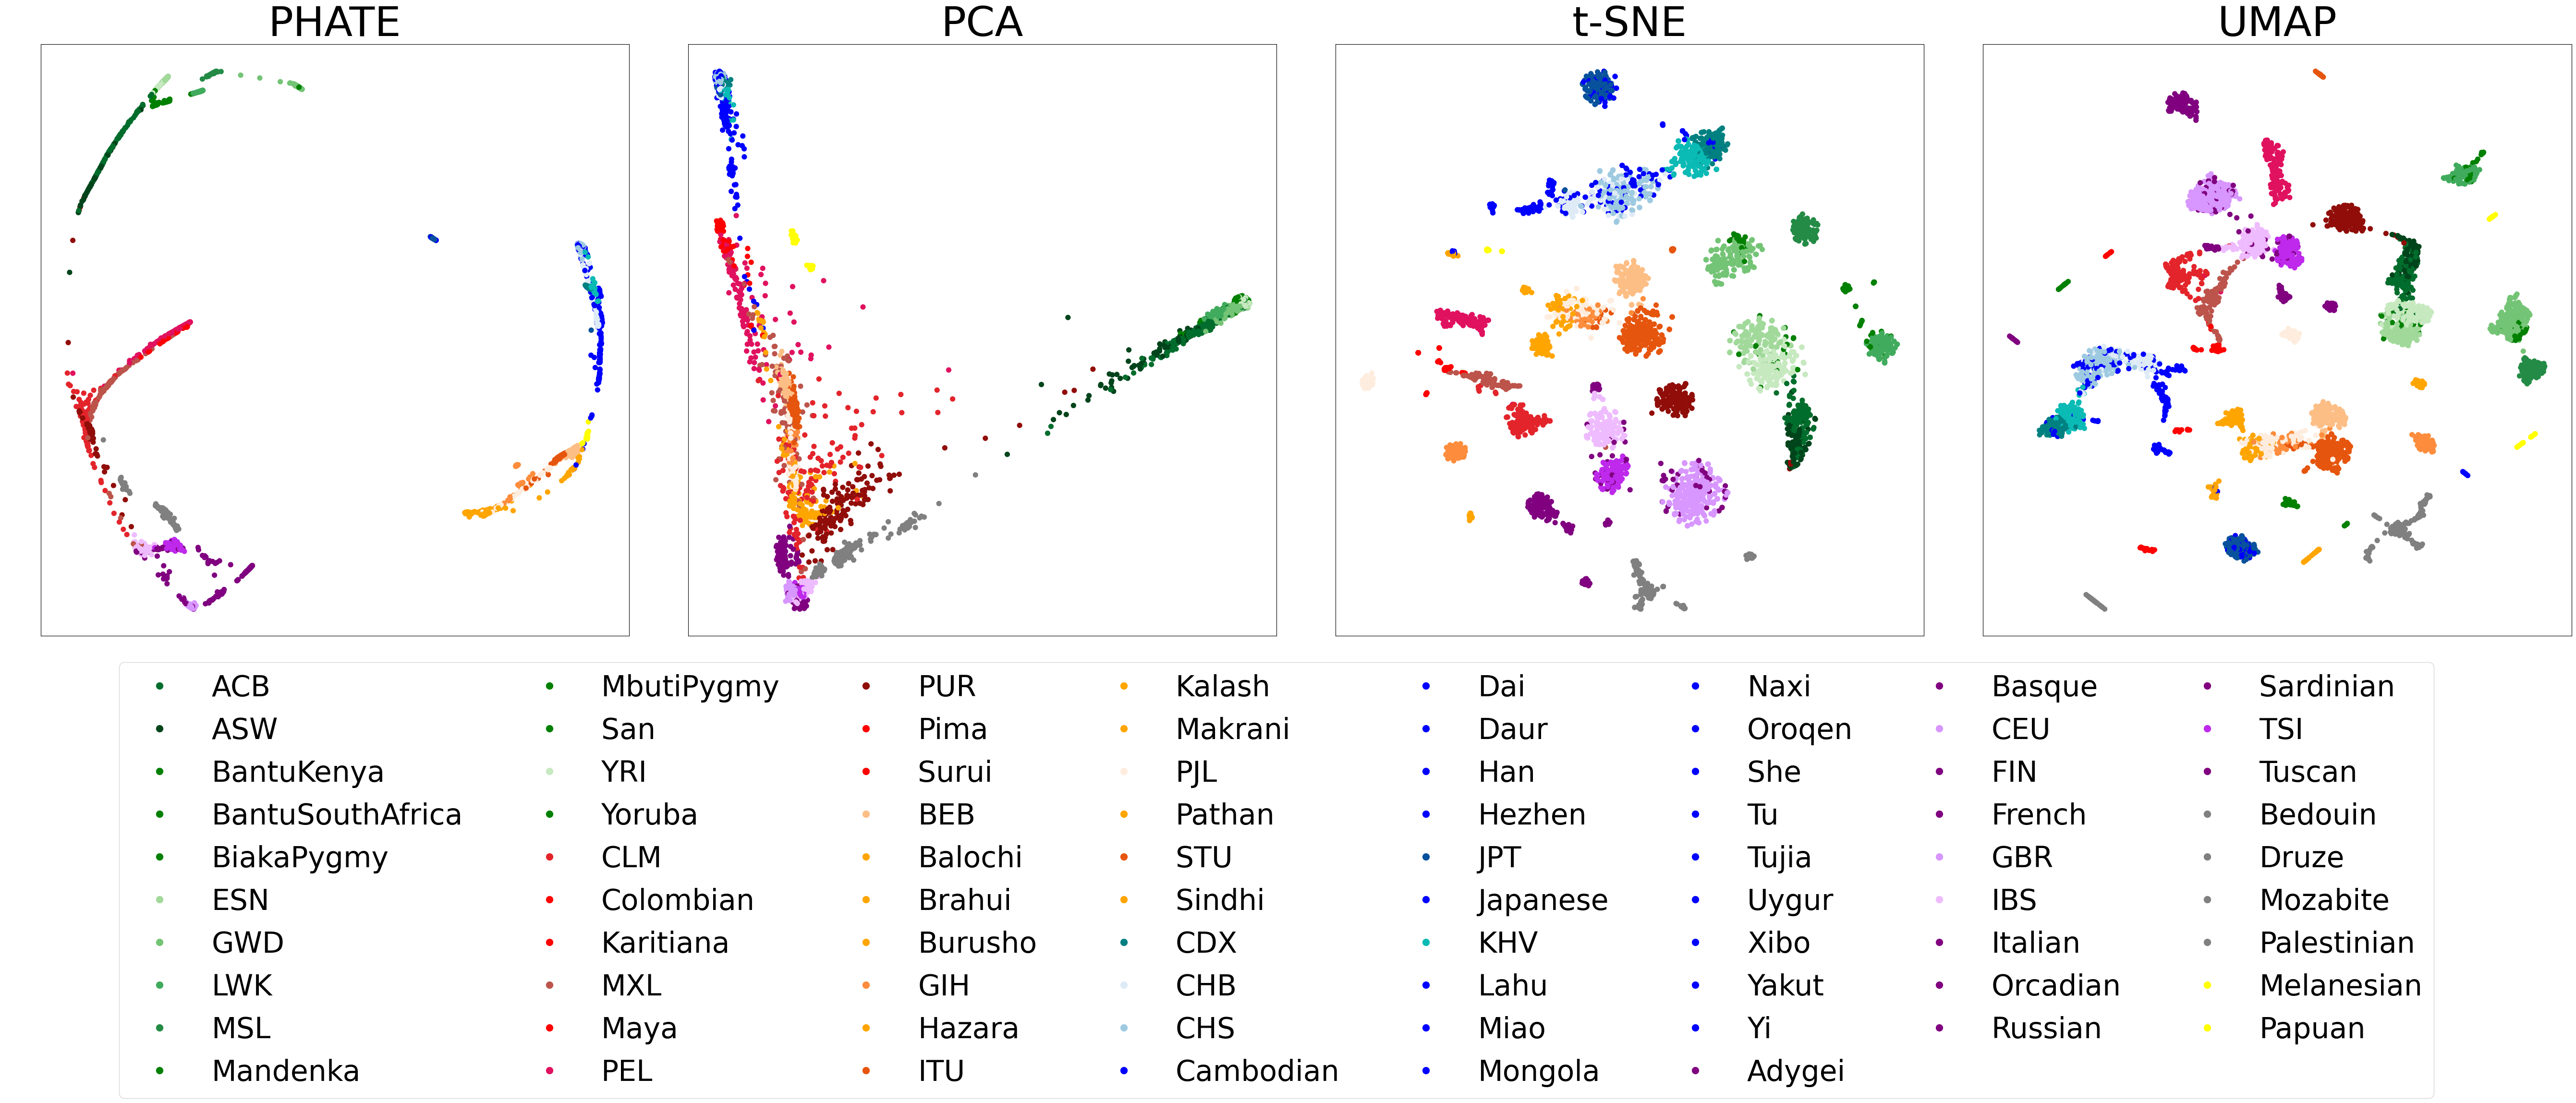

In [132]:
fig, axes = plt.subplots(1,4, figsize=(68, 16), gridspec_kw={'width_ratios': [1, 1, 1, 1], 'wspace': 0.1})

# PHATE
scprep.plot.scatter2d(phate_emb_2d, s=50, ax=axes[0],
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None,title='PHATE', fontsize=36)

# PCA
scprep.plot.scatter2d(inputs[:,:2], s=50, ax=axes[1],
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=True,xlabel=' ', ylabel=' ',
                      legend_loc='upper center', legend_anchor=(1.0, -0.02), legend_ncol=8,
                      label_prefix=None, title='PCA', fontsize=36)

# t-SNE
scprep.plot.scatter2d(tsne_emb_2d, s=50, ax=axes[2],
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='t-SNE', fontsize=36)
# UMAP
scprep.plot.scatter2d(umap_emb_2d, s=50, ax=axes[3],
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='UMAP', fontsize=36)


plt.savefig(Figure_PATH+'/HGDP_pop_4methods.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig(Figure_PATH+'/HGDP_pop_4methods.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


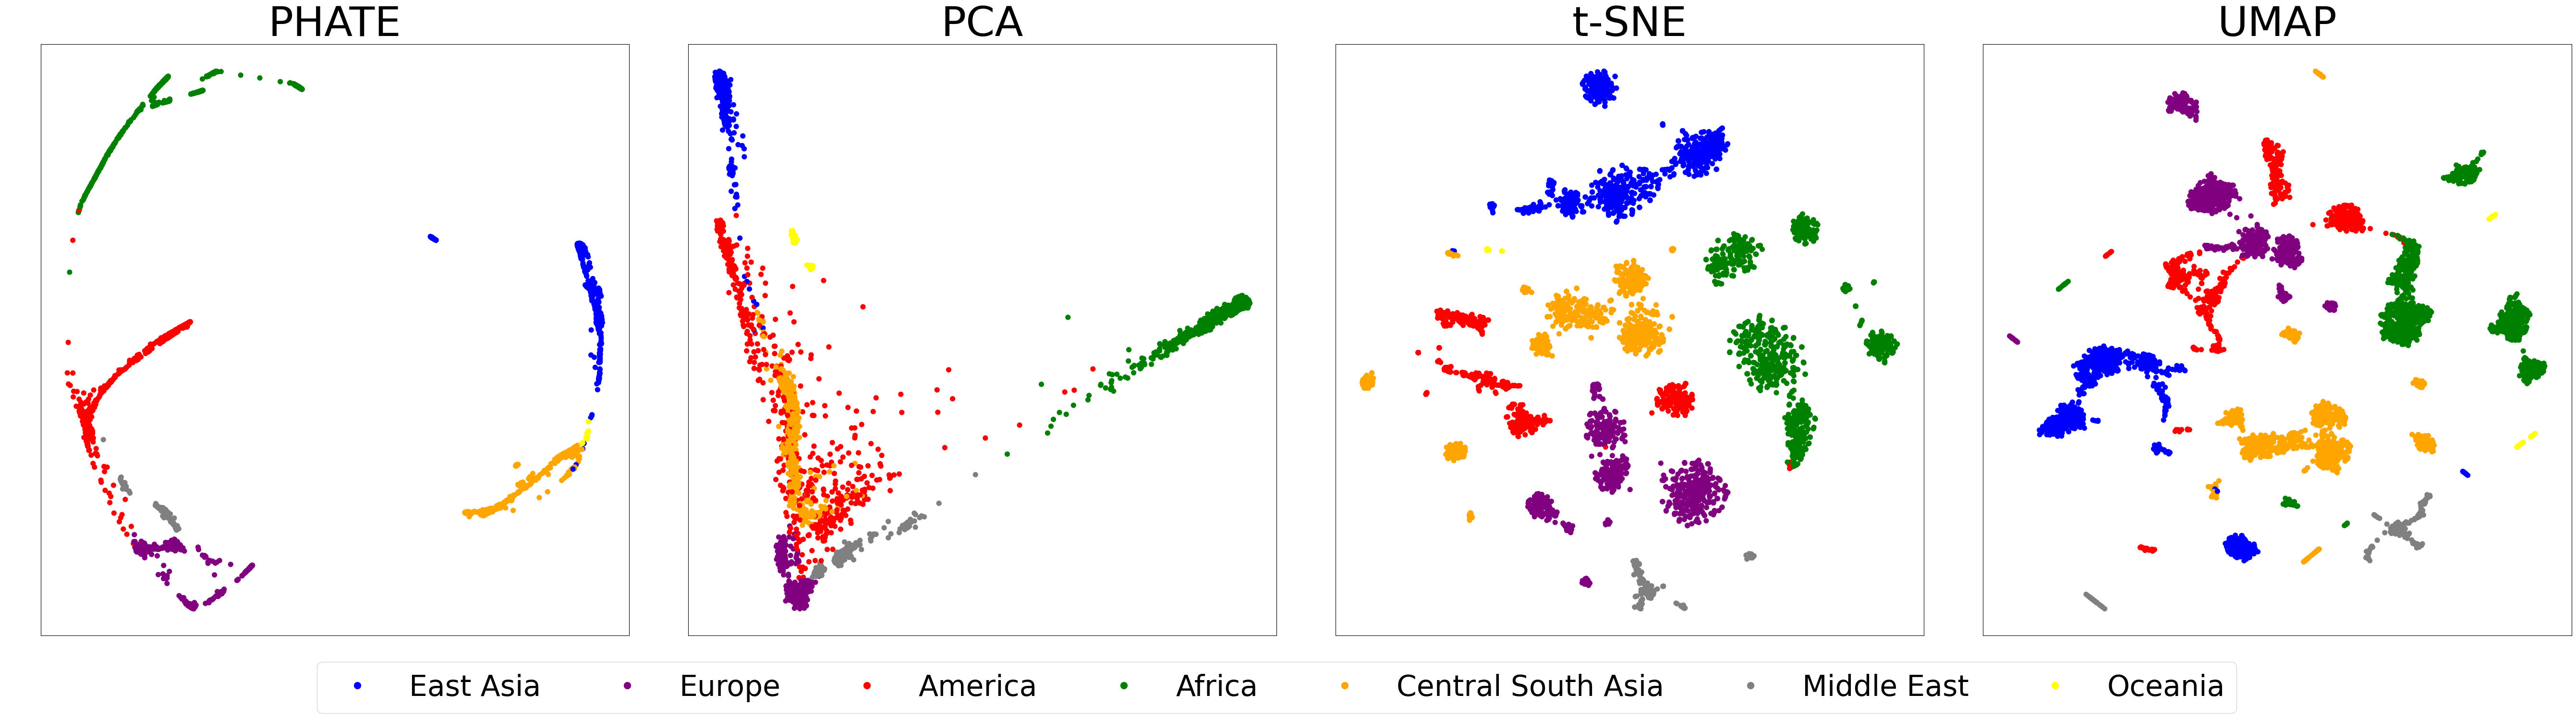

In [133]:
fig, axes = plt.subplots(1,4, figsize=(68, 16), gridspec_kw={'width_ratios': [1, 1, 1, 1], 'wspace': 0.1})

# PHATE
scprep.plot.scatter2d(phate_emb_2d, s=50, ax=axes[0],
                      cmap=cmap_genetic_region, c=label_genetic_region,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None,title='PHATE', fontsize=36)

# PCA
scprep.plot.scatter2d(inputs[:,:2], s=50, ax=axes[1],
                      cmap=cmap_genetic_region, c=label_genetic_region,
                      ticks =False, legend=True,xlabel=' ', ylabel=' ',
                      legend_loc='upper center', legend_anchor=(1.0, -0.02), legend_ncol=8,
                      label_prefix=None, title='PCA', fontsize=36)

# t-SNE
scprep.plot.scatter2d(tsne_emb_2d, s=50, ax=axes[2],
                      cmap=cmap_genetic_region, c=label_genetic_region,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='t-SNE', fontsize=36)
# UMAP
scprep.plot.scatter2d(umap_emb_2d, s=50, ax=axes[3],
                      cmap=cmap_genetic_region, c=label_genetic_region,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='UMAP', fontsize=36)


plt.savefig(Figure_PATH+'/HGDP_genetic_region_4methods.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig(Figure_PATH+'/HGDP_genetic_region_4methods.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

## plot 6 methods


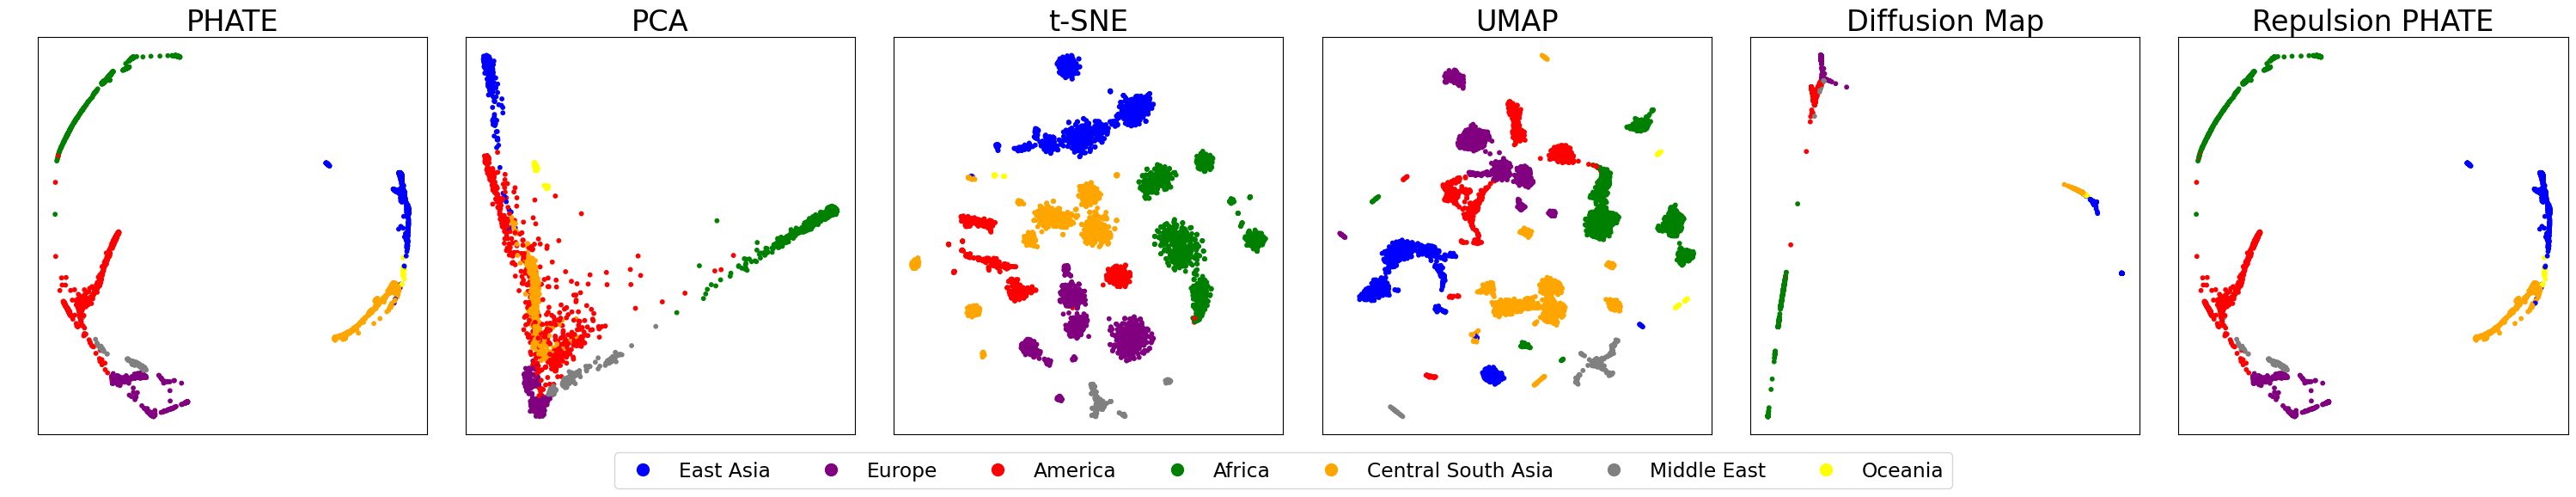

In [135]:
import matplotlib.patches as mpatches
n_methods = 6
fig, axes = plt.subplots(1,n_methods, figsize=(6*n_methods+2, 6), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 1], 'wspace': 0.1})

# PHATE
scprep.plot.scatter2d(phate_emb_2d, s=10, ax=axes[0],
                      cmap=cmap_genetic_region, c=label_genetic_region,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None,title='PHATE', fontsize=14)

# PCA
scprep.plot.scatter2d(inputs[:,:2], s=10, ax=axes[1],
                      cmap=cmap_genetic_region, c=label_genetic_region,
                      ticks =False, legend=False, xlabel=' ', ylabel=' ',
                      label_prefix=None,title='PCA', fontsize=14)

# t-SNE
scprep.plot.scatter2d(tsne_emb_2d, s=10, ax=axes[2],
                      cmap=cmap_genetic_region, c=label_genetic_region,
                      ticks =False, legend=True,xlabel=' ', ylabel=' ',
                      legend_loc='upper center', legend_anchor=(1.0, -0.02), legend_ncol=8,
                      label_prefix=None, title='t-SNE', fontsize=14)

# UMAP
scprep.plot.scatter2d(umap_emb_2d, s=10, ax=axes[3],
                      cmap=cmap_genetic_region, c=label_genetic_region,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='UMAP', fontsize=14)

# diffusion map
scprep.plot.scatter2d(diffusion_emb_2d, s=10, ax=axes[4],
                      cmap=cmap_genetic_region, c=label_genetic_region,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='Diffusion Map', fontsize=14)

# Repulsion PHATE
scprep.plot.scatter2d(repulsion_emb_2d, s=10, ax=axes[5],
                      cmap=cmap_genetic_region, c=label_genetic_region,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='Repulsion PHATE', fontsize=14)

plt.savefig(Figure_PATH+'/HGDP_genetic_region_6methods.png', format='png', bbox_inches='tight', dpi=300)
# plt.savefig(Figure_PATH+'/HGDP_genetic_region_6methods.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

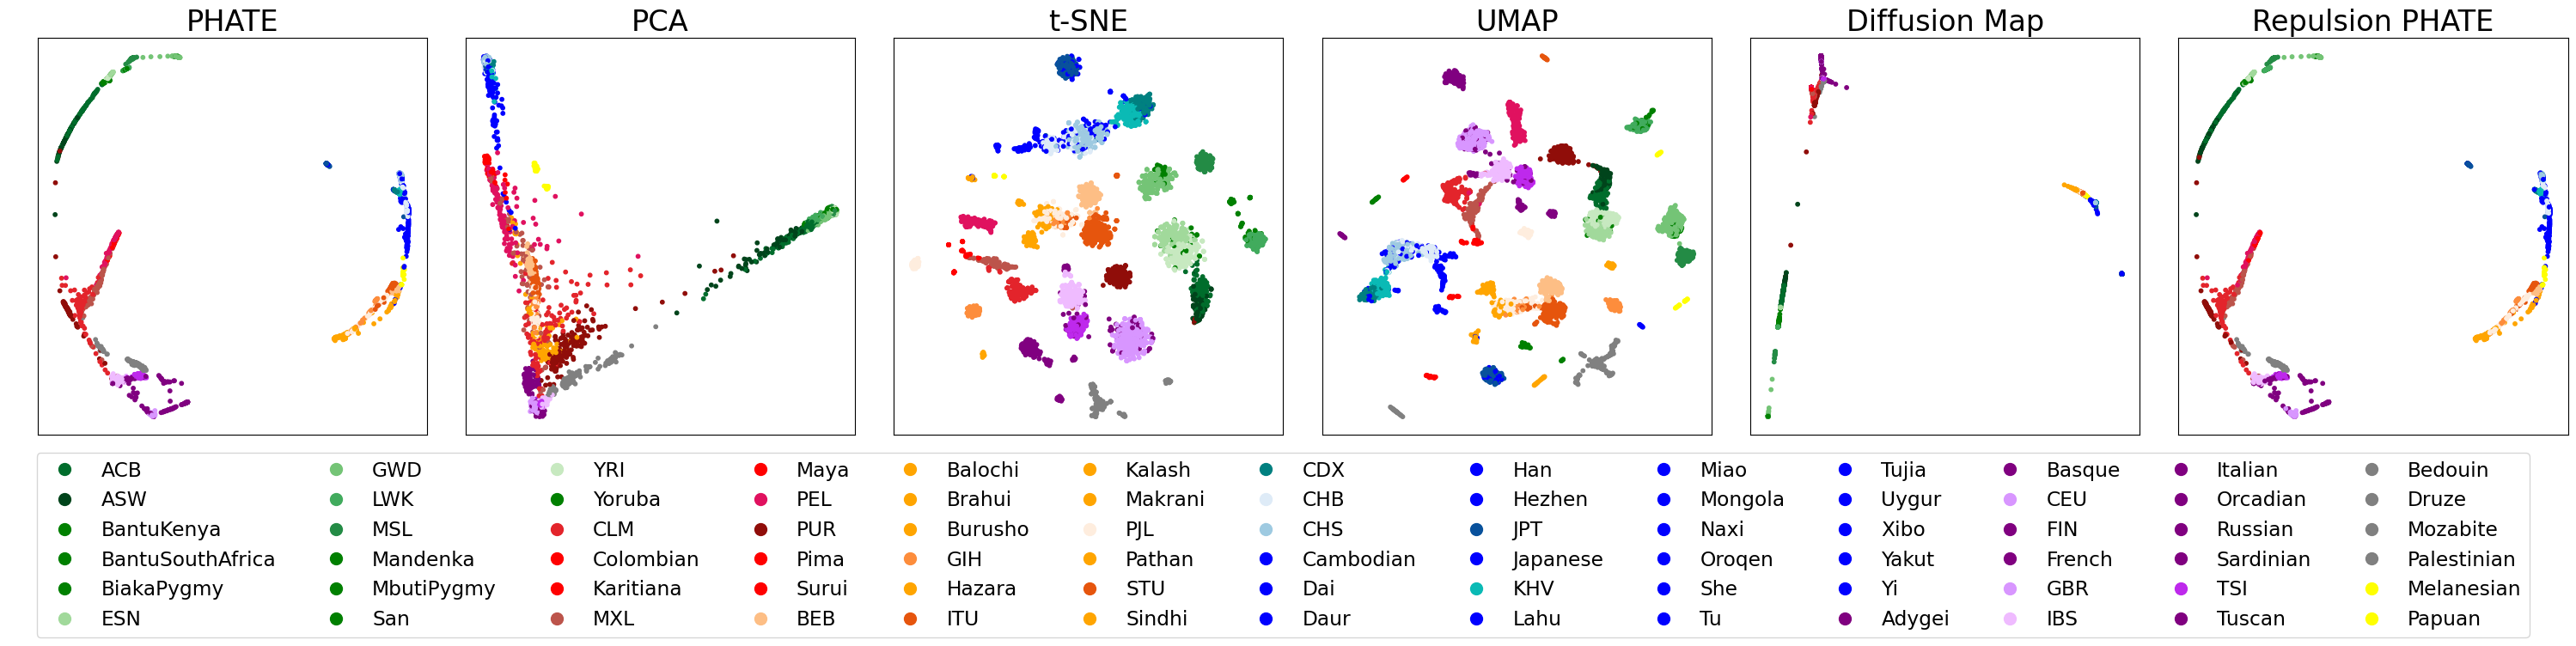

In [136]:
n_methods = 6
fig, axes = plt.subplots(1,n_methods, figsize=(6*n_methods+2, 6), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 1], 'wspace': 0.1})

# PHATE
scprep.plot.scatter2d(phate_emb_2d, s=10, ax=axes[0],
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None,title='PHATE', fontsize=14)

# PCA
scprep.plot.scatter2d(inputs[:,:2], s=10, ax=axes[1],
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=False, xlabel=' ', ylabel=' ',
                      label_prefix=None,title='PCA', fontsize=14)

# t-SNE
scprep.plot.scatter2d(tsne_emb_2d, s=10, ax=axes[2],
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=True,xlabel=' ', ylabel=' ',
                      legend_loc='upper center', legend_anchor=(1.0, -0.02), legend_ncol=13,
                      label_prefix=None, title='t-SNE', fontsize=14)

# UMAP
scprep.plot.scatter2d(umap_emb_2d, s=10, ax=axes[3],
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='UMAP', fontsize=14)

# diffusion map
scprep.plot.scatter2d(diffusion_emb_2d, s=10, ax=axes[4],
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='Diffusion Map', fontsize=14)

# Repulsion PHATE
scprep.plot.scatter2d(repulsion_emb_2d, s=10, ax=axes[5],
                      cmap=cmap_pop, c=label_pop,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='Repulsion PHATE', fontsize=14)

plt.savefig(Figure_PATH+'/HGDP_pop_6methods.png', format='png', bbox_inches='tight', dpi=300)
# plt.savefig(Figure_PATH+'/HGDP_genetic_region_6methods.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

# plot Admixture

In [137]:
# load admixture
admix_ratios = pd.read_csv(DATA_PATH + "/admixture/ADMIXTURE_HGDP+1KGP/global.5_metadata.tsv", sep='\t', index_col=0, header=None)
admix_ratios = admix_ratios.reset_index()
# remove last two columns
admix_ratios = admix_ratios.drop(admix_ratios.columns[-2:], axis=1)

In [138]:
metadata_row_names = metadata.index.tolist()    
# Extract row names from admix_ratios (column 0)
admix_row_names = admix_ratios.iloc[:, 0].tolist()
# Check if they are identical
is_identical = metadata_row_names == admix_row_names
print("Are the row names in the same order?", is_identical)


Are the row names in the same order? True


In [139]:
admix_ratios = admix_ratios.drop(admix_ratios.columns[:1], axis=1)
# assign collumn names
admix_ratios.columns = ['African Ancestry (%)', 'Amerindigenous Ancestry (%)', 'European Ancestry (%)', 'East Asian Ancestry (%)', 'Central South Asian Ancestry (%)']

In [144]:
# plot admixture function
def plot_admixture(embedding, admix_ratios, ax, label_prefix = None):
    for col, score_name in enumerate(admix_ratios.columns):
        if col == 0:
            scatter_admix = scprep.plot.scatter2d(embedding, 
                                                  s=10, ax=ax[col],
                                                  c=admix_ratios[score_name], 
                                                  xticks=False, 
                                                  yticks=False, 
                                                  legend=False,
                                                  label_prefix=label_prefix, 
                                                  xlabel=' ', ylabel=label_prefix,
                                                  fontsize=14, 
                                                  cmap='seismic')
        else:
            scatter_admix = scprep.plot.scatter2d(embedding, 
                                                s=10, ax=ax[col],
                                                c=admix_ratios[score_name], 
                                                xticks=False, 
                                                yticks=False, 
                                                legend=False,
                                                xlabel=' ', ylabel=' ',
                                                fontsize=14, 
                                                cmap='seismic')
    return scatter_admix



## 4 methods

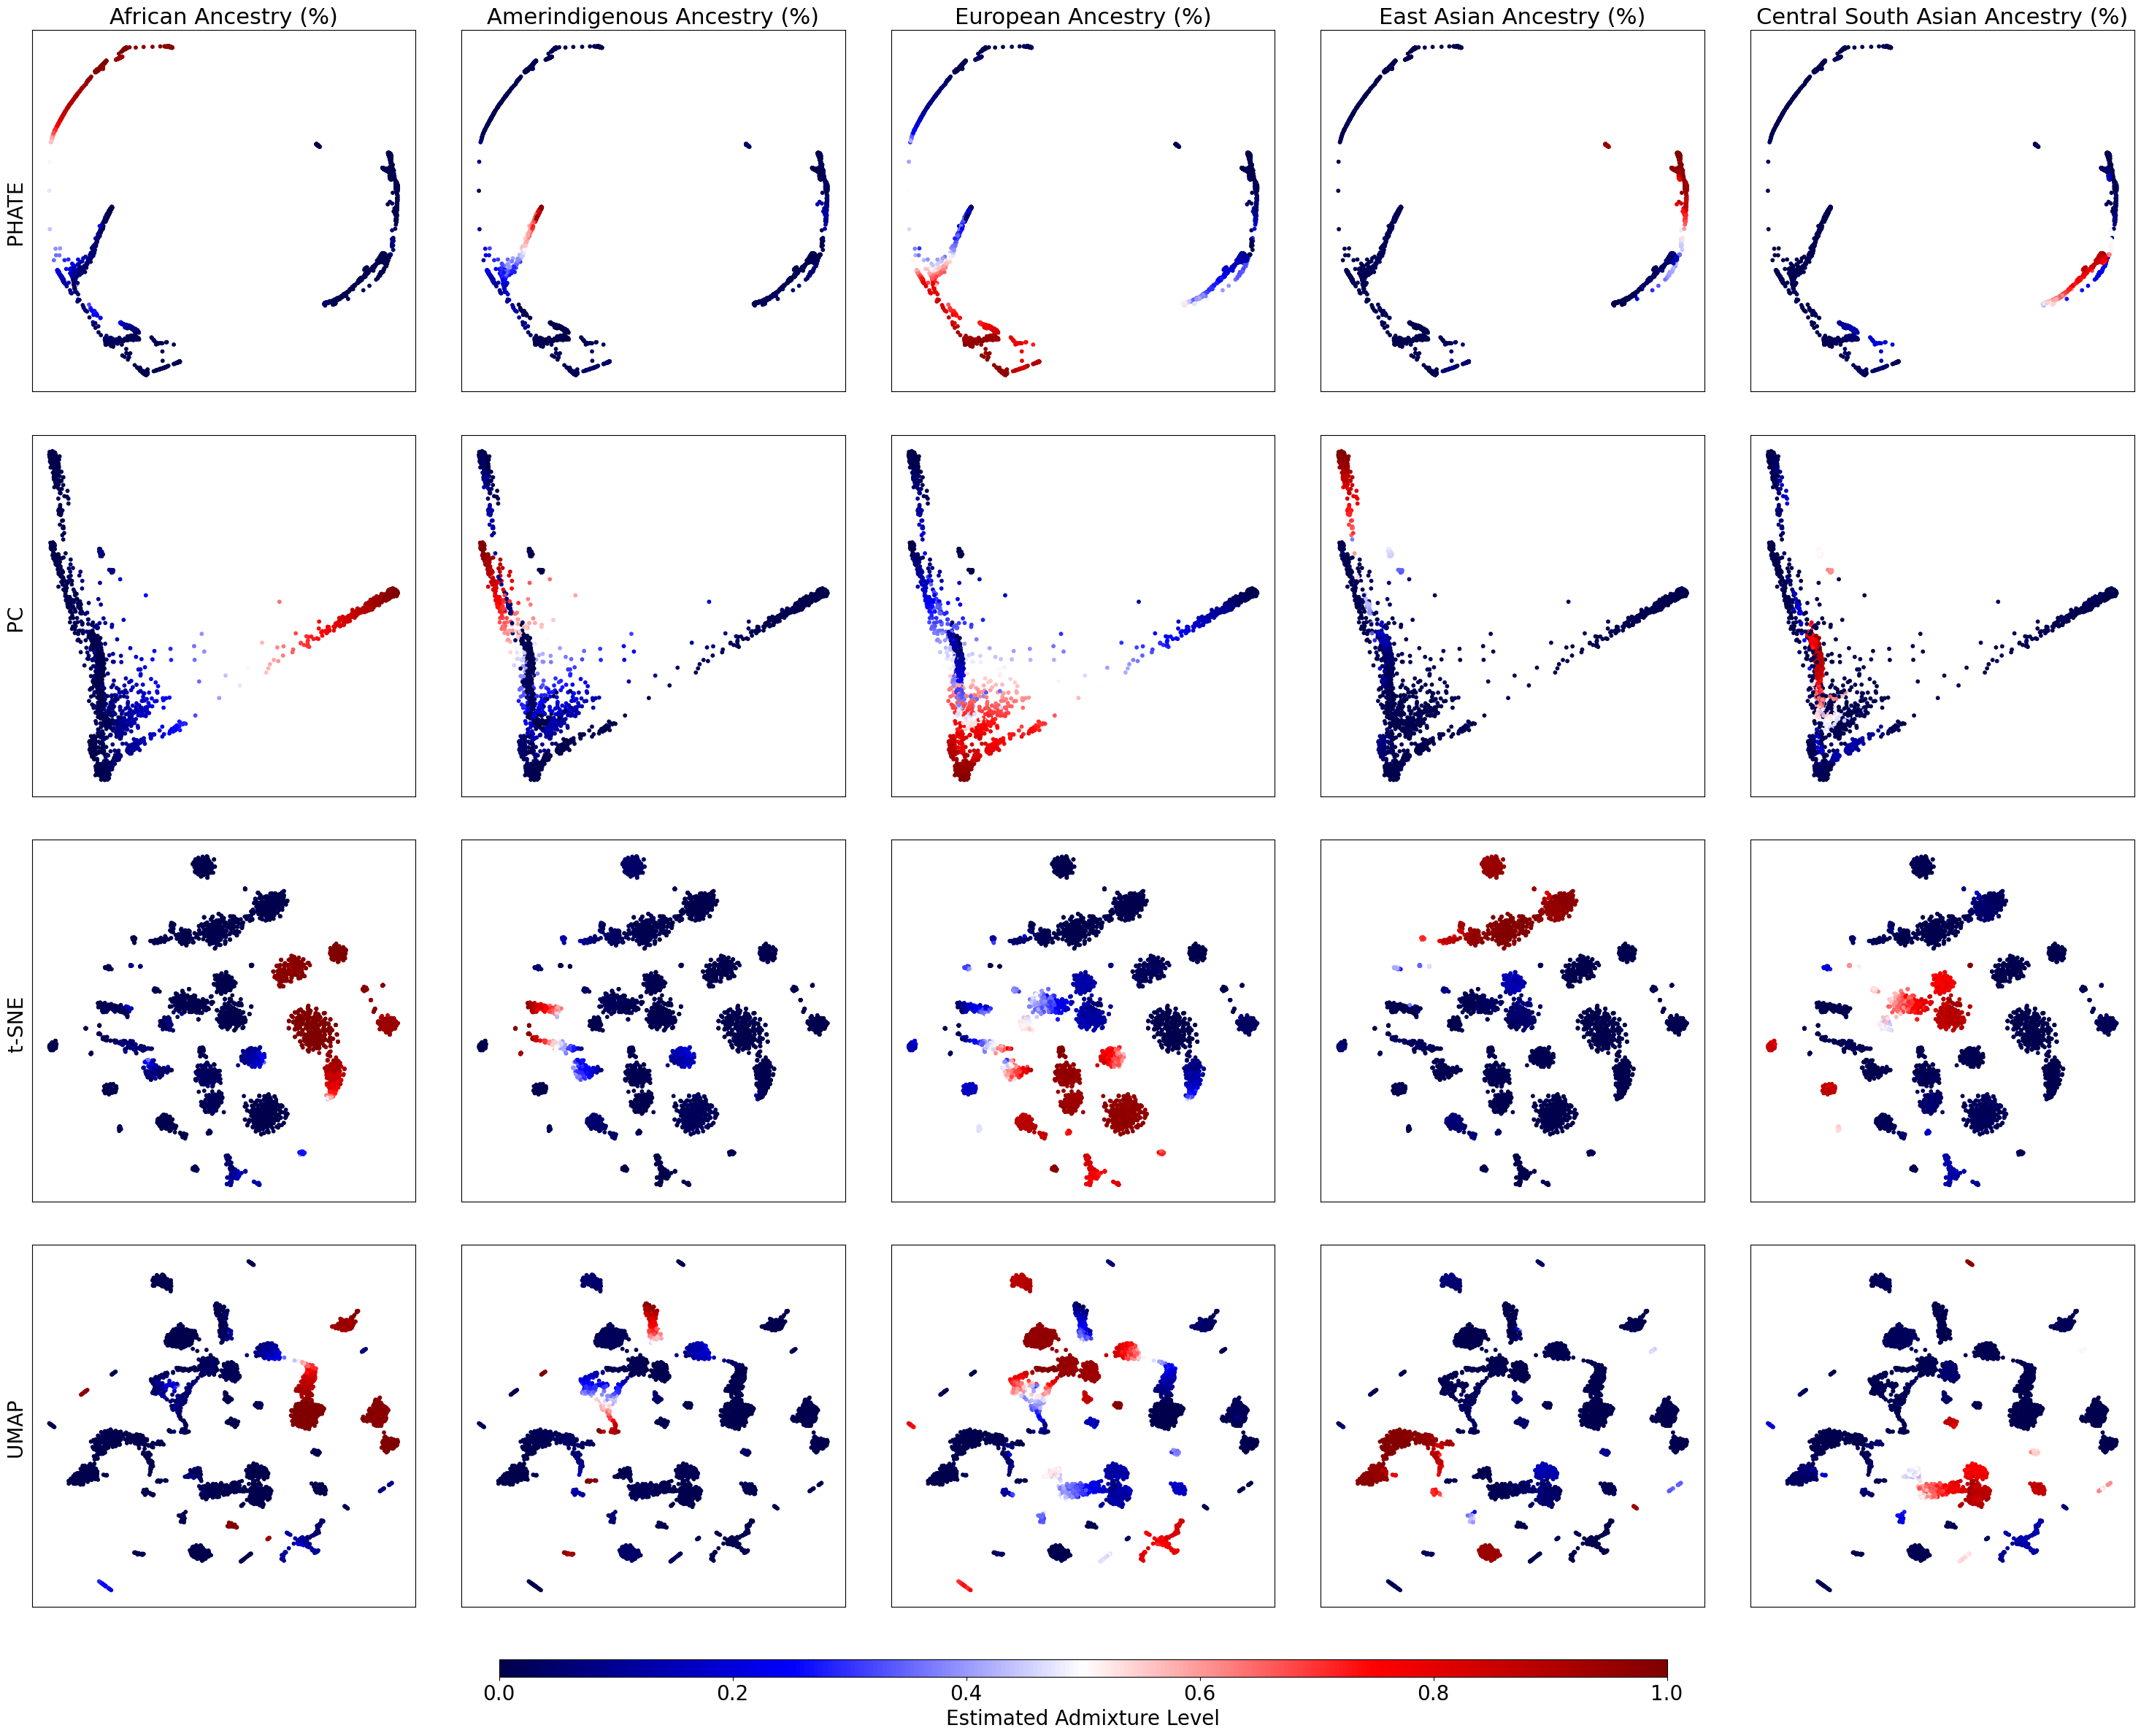

In [148]:
ncols = 5
nrows = 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6+2,nrows*6), gridspec_kw={'wspace': 0.12, 'hspace': 0.12})
scatter_admix = plot_admixture(phate_emb_2d, admix_ratios, ax[0], label_prefix='PHATE ')
scatter_admix= plot_admixture(inputs[:,:2], admix_ratios, ax[1], label_prefix='PC ')
scatter_admix= plot_admixture(tsne_emb_2d, admix_ratios, ax[2], label_prefix='t-SNE ')
scatter_admix = plot_admixture(umap_emb_2d, admix_ratios, ax[3], label_prefix='UMAP ')


for i, score_name in enumerate(admix_ratios.columns):
    ax[0][i].set_title(score_name, fontsize=22)

# Add colorbar
cbar_ax = fig.add_axes([0.25, 0.01, 0.5, 0.01])  # x-position (left margin), y-position (bottom margin), width, height
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.seismic), cax=cbar_ax, orientation='horizontal', fraction=0.02)
cbar.set_label('Estimated Admixture Level', fontsize=20)
cbar.ax.tick_params(labelsize=20)  

# Manually adjust the layout
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.3, wspace=0.3)

plt.savefig(Figure_PATH+'/HGDP_5admixtures_4methods.png', format='png', bbox_inches='tight', dpi = 300)
# plt.savefig(Figure_PATH+'/HGDP_5admixtures_4methods.eps', format='eps', bbox_inches='tight', dpi = 300)

## 6 methods

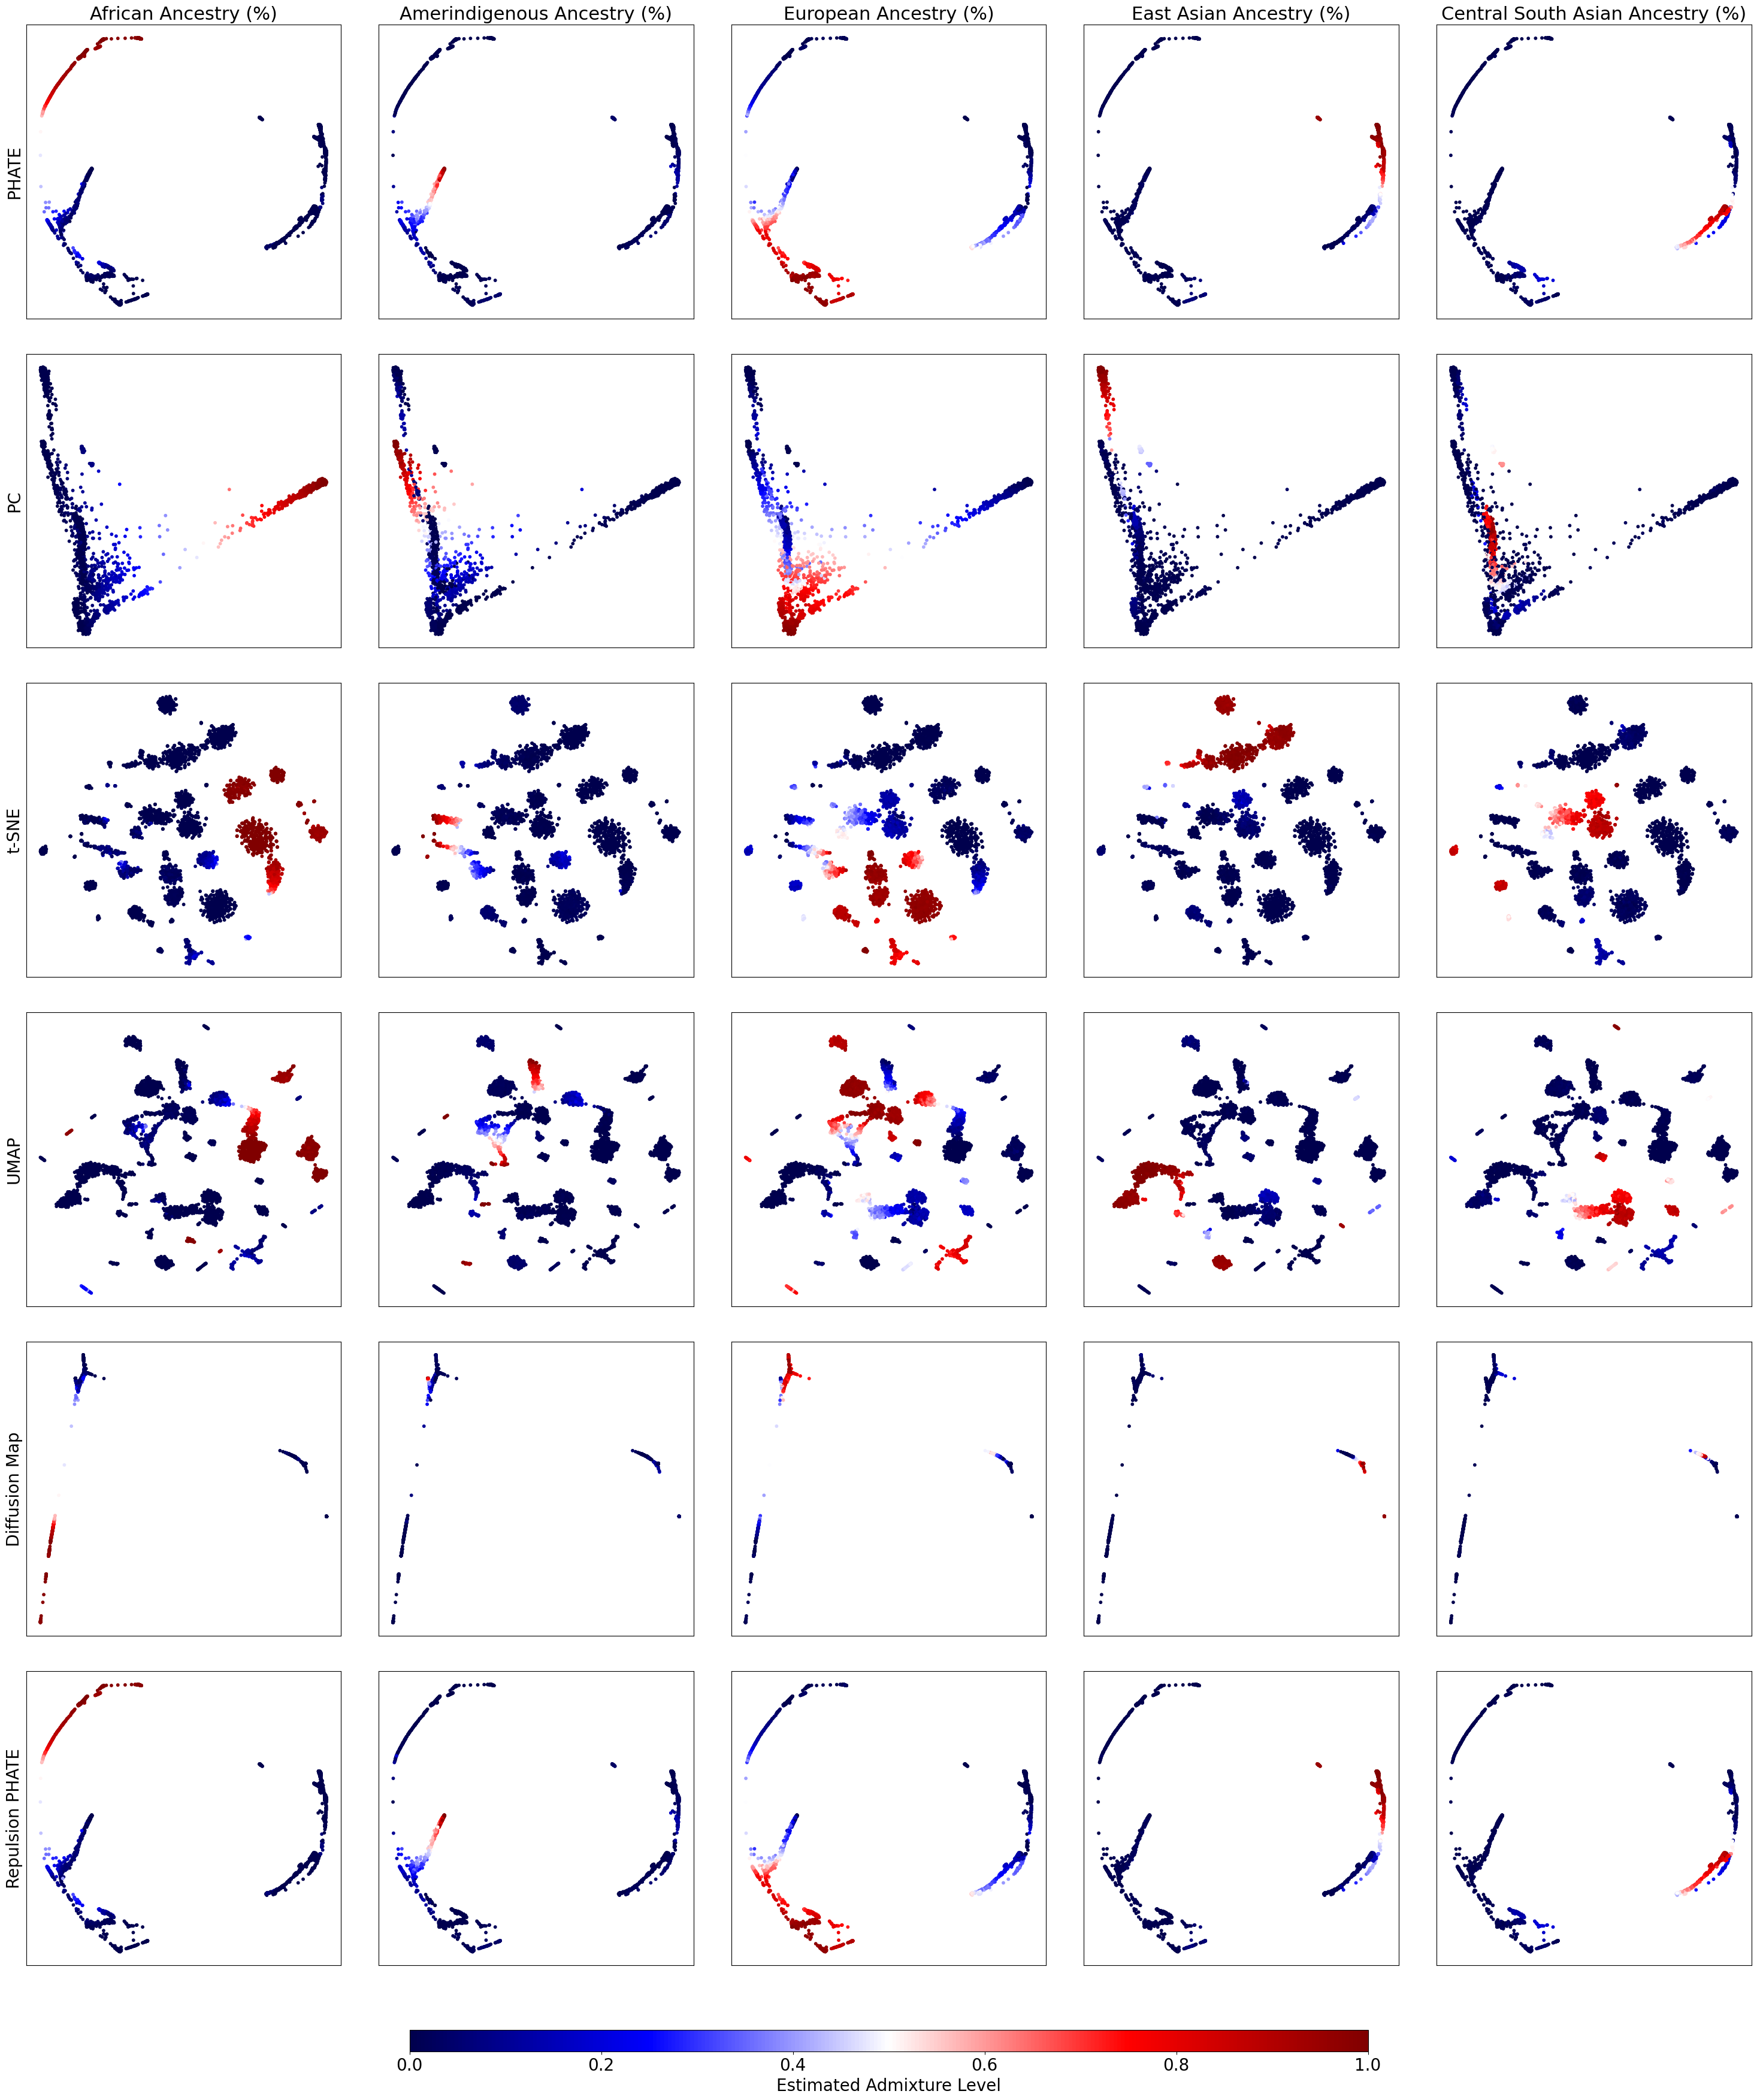

In [150]:
ncols = 5
nrows = 6
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6 +2,nrows*6), gridspec_kw={'wspace': 0.12, 'hspace': 0.12})
scatter_admix = plot_admixture(phate_emb_2d, admix_ratios, ax[0], label_prefix='PHATE')
scatter_admix= plot_admixture(inputs[:,:2], admix_ratios, ax[1], label_prefix='PC')
scatter_admix= plot_admixture(tsne_emb_2d, admix_ratios, ax[2], label_prefix='t-SNE')
scatter_admix = plot_admixture(umap_emb_2d, admix_ratios, ax[3], label_prefix='UMAP')
scatter_admix = plot_admixture(diffusion_emb_2d, admix_ratios, ax[4], label_prefix='Diffusion Map')
scatter_admix = plot_admixture(repulsion_emb_2d, admix_ratios, ax[5], label_prefix='Repulsion PHATE')


for i, score_name in enumerate(admix_ratios.columns):
    ax[0][i].set_title(score_name, fontsize=22)

# Add colorbar
cbar_ax = fig.add_axes([0.25, 0.01, 0.5, 0.01])  # x-position (left margin), y-position (bottom margin), width, height
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.seismic), cax=cbar_ax, orientation='horizontal', fraction=0.02)
cbar.set_label('Estimated Admixture Level', fontsize=20)
cbar.ax.tick_params(labelsize=20)  

# Manually adjust the layout
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.3, wspace=0.3)

plt.savefig(Figure_PATH+'/HGDP_5admixtures_6methods.png', format='png', bbox_inches='tight', dpi = 300)
# plt.savefig(Figure_PATH+'/HGDP_5admixtures_6methods.eps', format='eps', bbox_inches='tight', dpi = 300)

## Amerindigenous admixture only, 6 methods

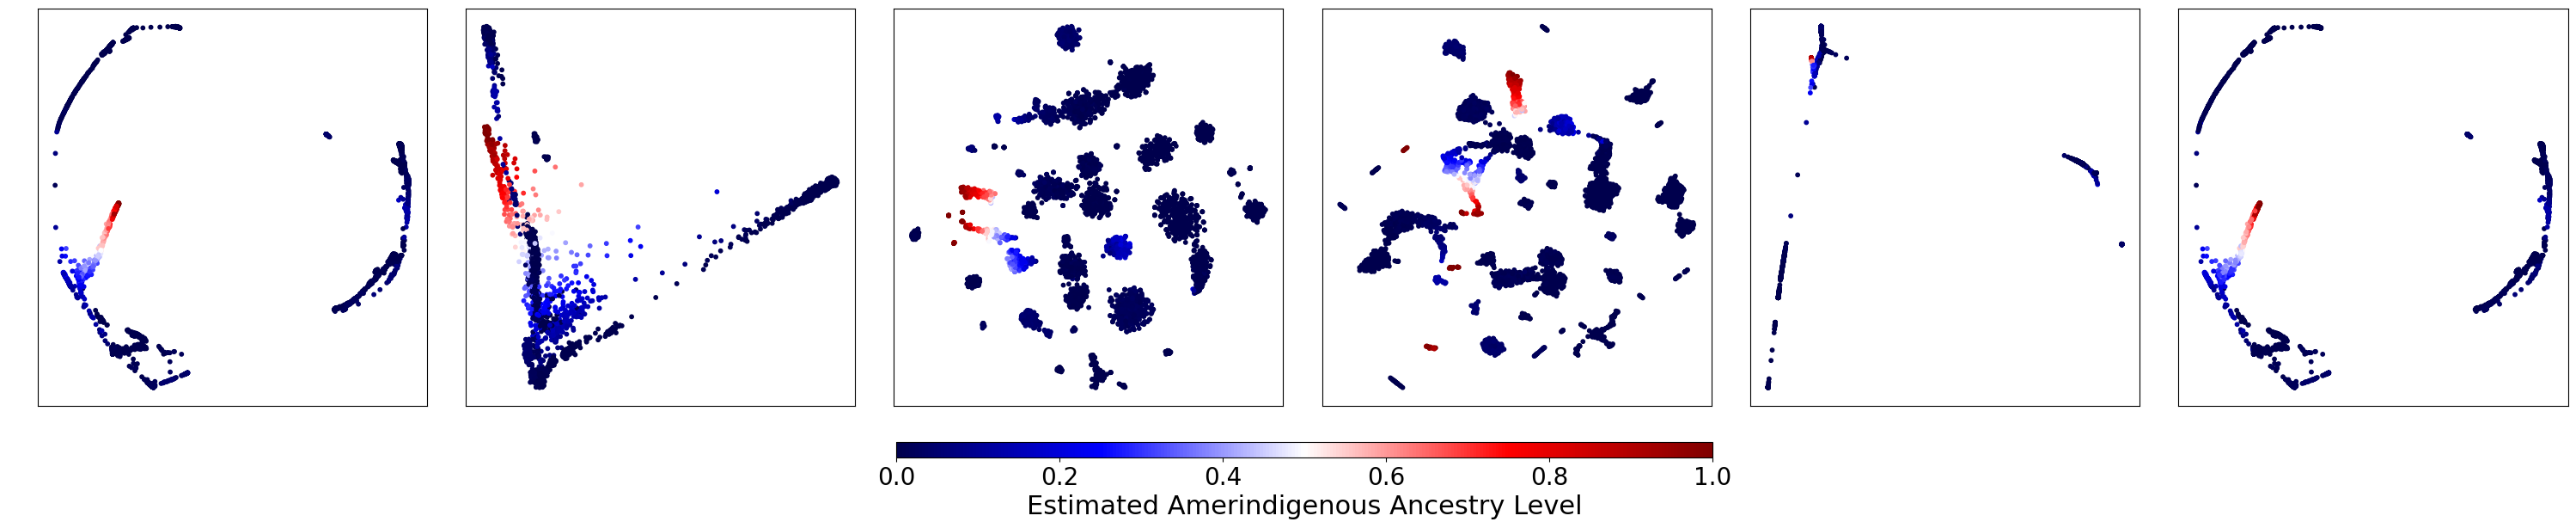

In [154]:
admix = admix_ratios['Amerindigenous Ancestry (%)']
n_methods = 6
fig, axes = plt.subplots(1,n_methods, figsize=(6*n_methods+2, 6), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 1], 'wspace': 0.1})

# PHATE
scprep.plot.scatter2d(phate_emb_2d, s=10, ax=axes[0],
                      cmap='seismic', c=admix,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None,title=None, fontsize=14)

# PCA
scprep.plot.scatter2d(inputs[:,:2], s=10, ax=axes[1],
                      cmap='seismic', c=admix,
                      ticks =False, legend=False, xlabel=' ', ylabel=' ',
                      label_prefix=None,title=None, fontsize=14)

# t-SNE
scprep.plot.scatter2d(tsne_emb_2d, s=10, ax=axes[2],
                      cmap='seismic', c=admix,
                      ticks =False, legend=False, xlabel=' ', ylabel=' ',
                      label_prefix=None,title=None, fontsize=14)
# UMAP
scprep.plot.scatter2d(umap_emb_2d, s=10, ax=axes[3],
                      cmap='seismic', c=admix,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title=None, fontsize=14)

# diffusion map
scprep.plot.scatter2d(diffusion_emb_2d, s=10, ax=axes[4],
                      cmap='seismic', c=admix,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title=None, fontsize=14)

# Repulsion PHATE
scprep.plot.scatter2d(repulsion_emb_2d, s=10, ax=axes[5],
                      cmap='seismic', c=admix,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title=None, fontsize=14)

# Add colorbar
cbar_ax = fig.add_axes([0.388, 0.01, 0.25, 0.03])  # x-position (left margin), y-position (bottom margin), width, height
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.seismic), cax=cbar_ax, orientation='horizontal', fraction=0.02)
cbar.set_label('Estimated Amerindigenous Ancestry Level', fontsize=22)
cbar.ax.tick_params(labelsize=20)  

plt.savefig(Figure_PATH+'/HGDP_amer_admix_6methods.png', format='png', bbox_inches='tight', dpi=300)
# plt.savefig(Figure_PATH+'/HGDP_amer_admix_6methods.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

# plot confusion matrix & ARI

## 10D embeddings for all methods

In [ ]:
# PHATE
phate_op_10d = phate.PHATE(random_state=42, 
                          n_components=10, 
                          knn=80, 
                          t=6, 
                          decay=60,
                          verbose=False,
                          n_pca=None)
phate_op_10d.fit(inputs)
phate_emb_10d = phate_op_10d.transform()

# UMAP
umap_op_10d = umap.UMAP(n_components=10, n_neighbors=6, min_dist=0.6, random_state=42)
umap_emb_10d = umap_op_10d.fit_transform(inputs)



In [11]:
# t-SNE
tsne_op_10d = TSNE(n_components=10, perplexity=20, n_iter=1000, random_state=4, method='exact')
tsne_emb_10d = tsne_op_10d.fit_transform(inputs)

# diffusion map embeddings
dm_obj_10d = DiffusionMap(n_components=10, knn=120, t=10)
dm_obj_10d.fit(inputs)
diffusion_emb_10d = dm_obj_10d.transform(inputs)


/home/mila/s/shuang.ni/manifold_genetics/.venv/lib/python3.9/site-packages/graphtools/graphs.py:116: UserWarning: Cannot set knn_max (100) to be less than knn (120). Setting knn_max=120
  warnings.warn(


In [ ]:
# save 10D embeddings in txt

np.savetxt(SAVE_PATH + "/PHATE_10D.txt", phate_emb_10d)
np.savetxt(SAVE_PATH + "/UMAP_10D.txt", umap_emb_10d)
np.savetxt(SAVE_PATH + "/tSNE_10D.txt", tsne_emb_10d)
np.savetxt(SAVE_PATH + "/diffusion_10D.txt", diffusion_emb_10d)

## load 10D embeddings from saved txt

In [13]:
# load 10D embeddings from txt
inputs = np.loadtxt(SAVE_PATH + "/PCA_50D.txt")
phate_emb_10d = np.loadtxt(SAVE_PATH + "/PHATE_10D.txt")
umap_emb_10d = np.loadtxt(SAVE_PATH + "/UMAP_10D.txt")
tsne_emb_10d = np.loadtxt(SAVE_PATH + "/tSNE_10D.txt")
diffusion_emb_10d = np.loadtxt(SAVE_PATH + "/diffusion_10D.txt")

In [106]:
def make_confusion_heatmap(true_labels, clusterer_labels, ax=None, colorbar=True, method = 'HDBSCAN', title = ''):
    """
    Create a confusion heatmap of the populations and clusters.

    Parameters
    ----------
    true_labels : array-like
        The true population labels. 
    clusterer_labels : array-like
        The cluster labels assigned by the clustering algorithm.
    ax : matplotlib axis
    colorbar : bool, optional, default: True
    method : str, optional, default: 'HDBSCAN', can also be 'Kmeans'

    Returns 
    -------
    heatmap : seaborn heatmap
        The heatmap of the confusion matrix.
    """
    df = pd.DataFrame(columns=['Cluster', 'Population'])
    df['Cluster'] = clusterer_labels
    df['Population'] = true_labels

    # Filter out the -1 cluster (unclustered data)
    df = df[df['Cluster'] != -1]
    # Create a cross-tabulation of clusters and populations
    crosstab = pd.crosstab(df['Cluster'], df['Population'])

    # Convert counts to proportions
    proportions = crosstab.div(crosstab.sum(axis=1), axis=0)
    # # sort rows with max value in each row
    # proportions = proportions.loc[proportions.max(axis=1).sort_values(ascending=False).index]
    # # reassign index
    # proportions = proportions.reset_index(drop=True)
   
    # # Reorder populations based on new cluster order
    ordered_populations = proportions.idxmax().sort_values().index
    proportions = proportions[ordered_populations]

    # Plot the heatmap
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    heatmap = sns.heatmap(proportions, cmap='viridis', annot=False,linewidths=0.05, linecolor='purple', 
                            cbar=colorbar if colorbar else None, cbar_kws={'shrink': 0.8} if colorbar else None, ax=ax)
    heatmap.invert_yaxis()
    ax.set_xlabel('Population', fontsize=30)
    ax.set_ylabel(method + ' Cluster', fontsize=30)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=14)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)
    # remove y tickle and labels
    # ax.yaxis.set_ticks([])
    # ax.yaxis.set_ticklabels([])

    
    label_encoder = LabelEncoder()
    encoded_true_labels = label_encoder.fit_transform(true_labels)
    ARI = adjusted_rand_score(encoded_true_labels, clusterer_labels)
    ax.set_title(f'{title} \n (ARI = {round(ARI, 3)})', size=46)

    # Adjust the color bar tick labels font size
    if colorbar:
        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(labelsize=20)
    return heatmap

## kmeans clustering

In [87]:
# k means cluster
k = metadata['Population'].nunique()  # Specify the number of clusters = 78
kmeans = KMeans(n_clusters=k-10, random_state=42)
# methods = ['phate','pc10','pc50', 'umap', 'tsne', 'diffusion']
phate_clusterer_labels = kmeans.fit_predict(phate_emb_10d)
pc10_clusterer_labels = kmeans.fit_predict(inputs[:,:10])
pc50_clusterer_labels = kmeans.fit_predict(inputs)
umap_clusterer_labels = kmeans.fit_predict(umap_emb_10d)
tsne_clusterer_labels = kmeans.fit_predict(tsne_emb_10d)
diffusion_clusterer_labels = kmeans.fit_predict(diffusion_emb_10d)



/home/mila/s/shuang.ni/manifold_genetics/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mila/s/shuang.ni/manifold_genetics/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mila/s/shuang.ni/manifold_genetics/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mila/s/shuang.ni/manifold_genetics/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

/tmp/ipykernel_3899175/2046623825.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.78, 1])  # Adjust layout to make space for the colorbar


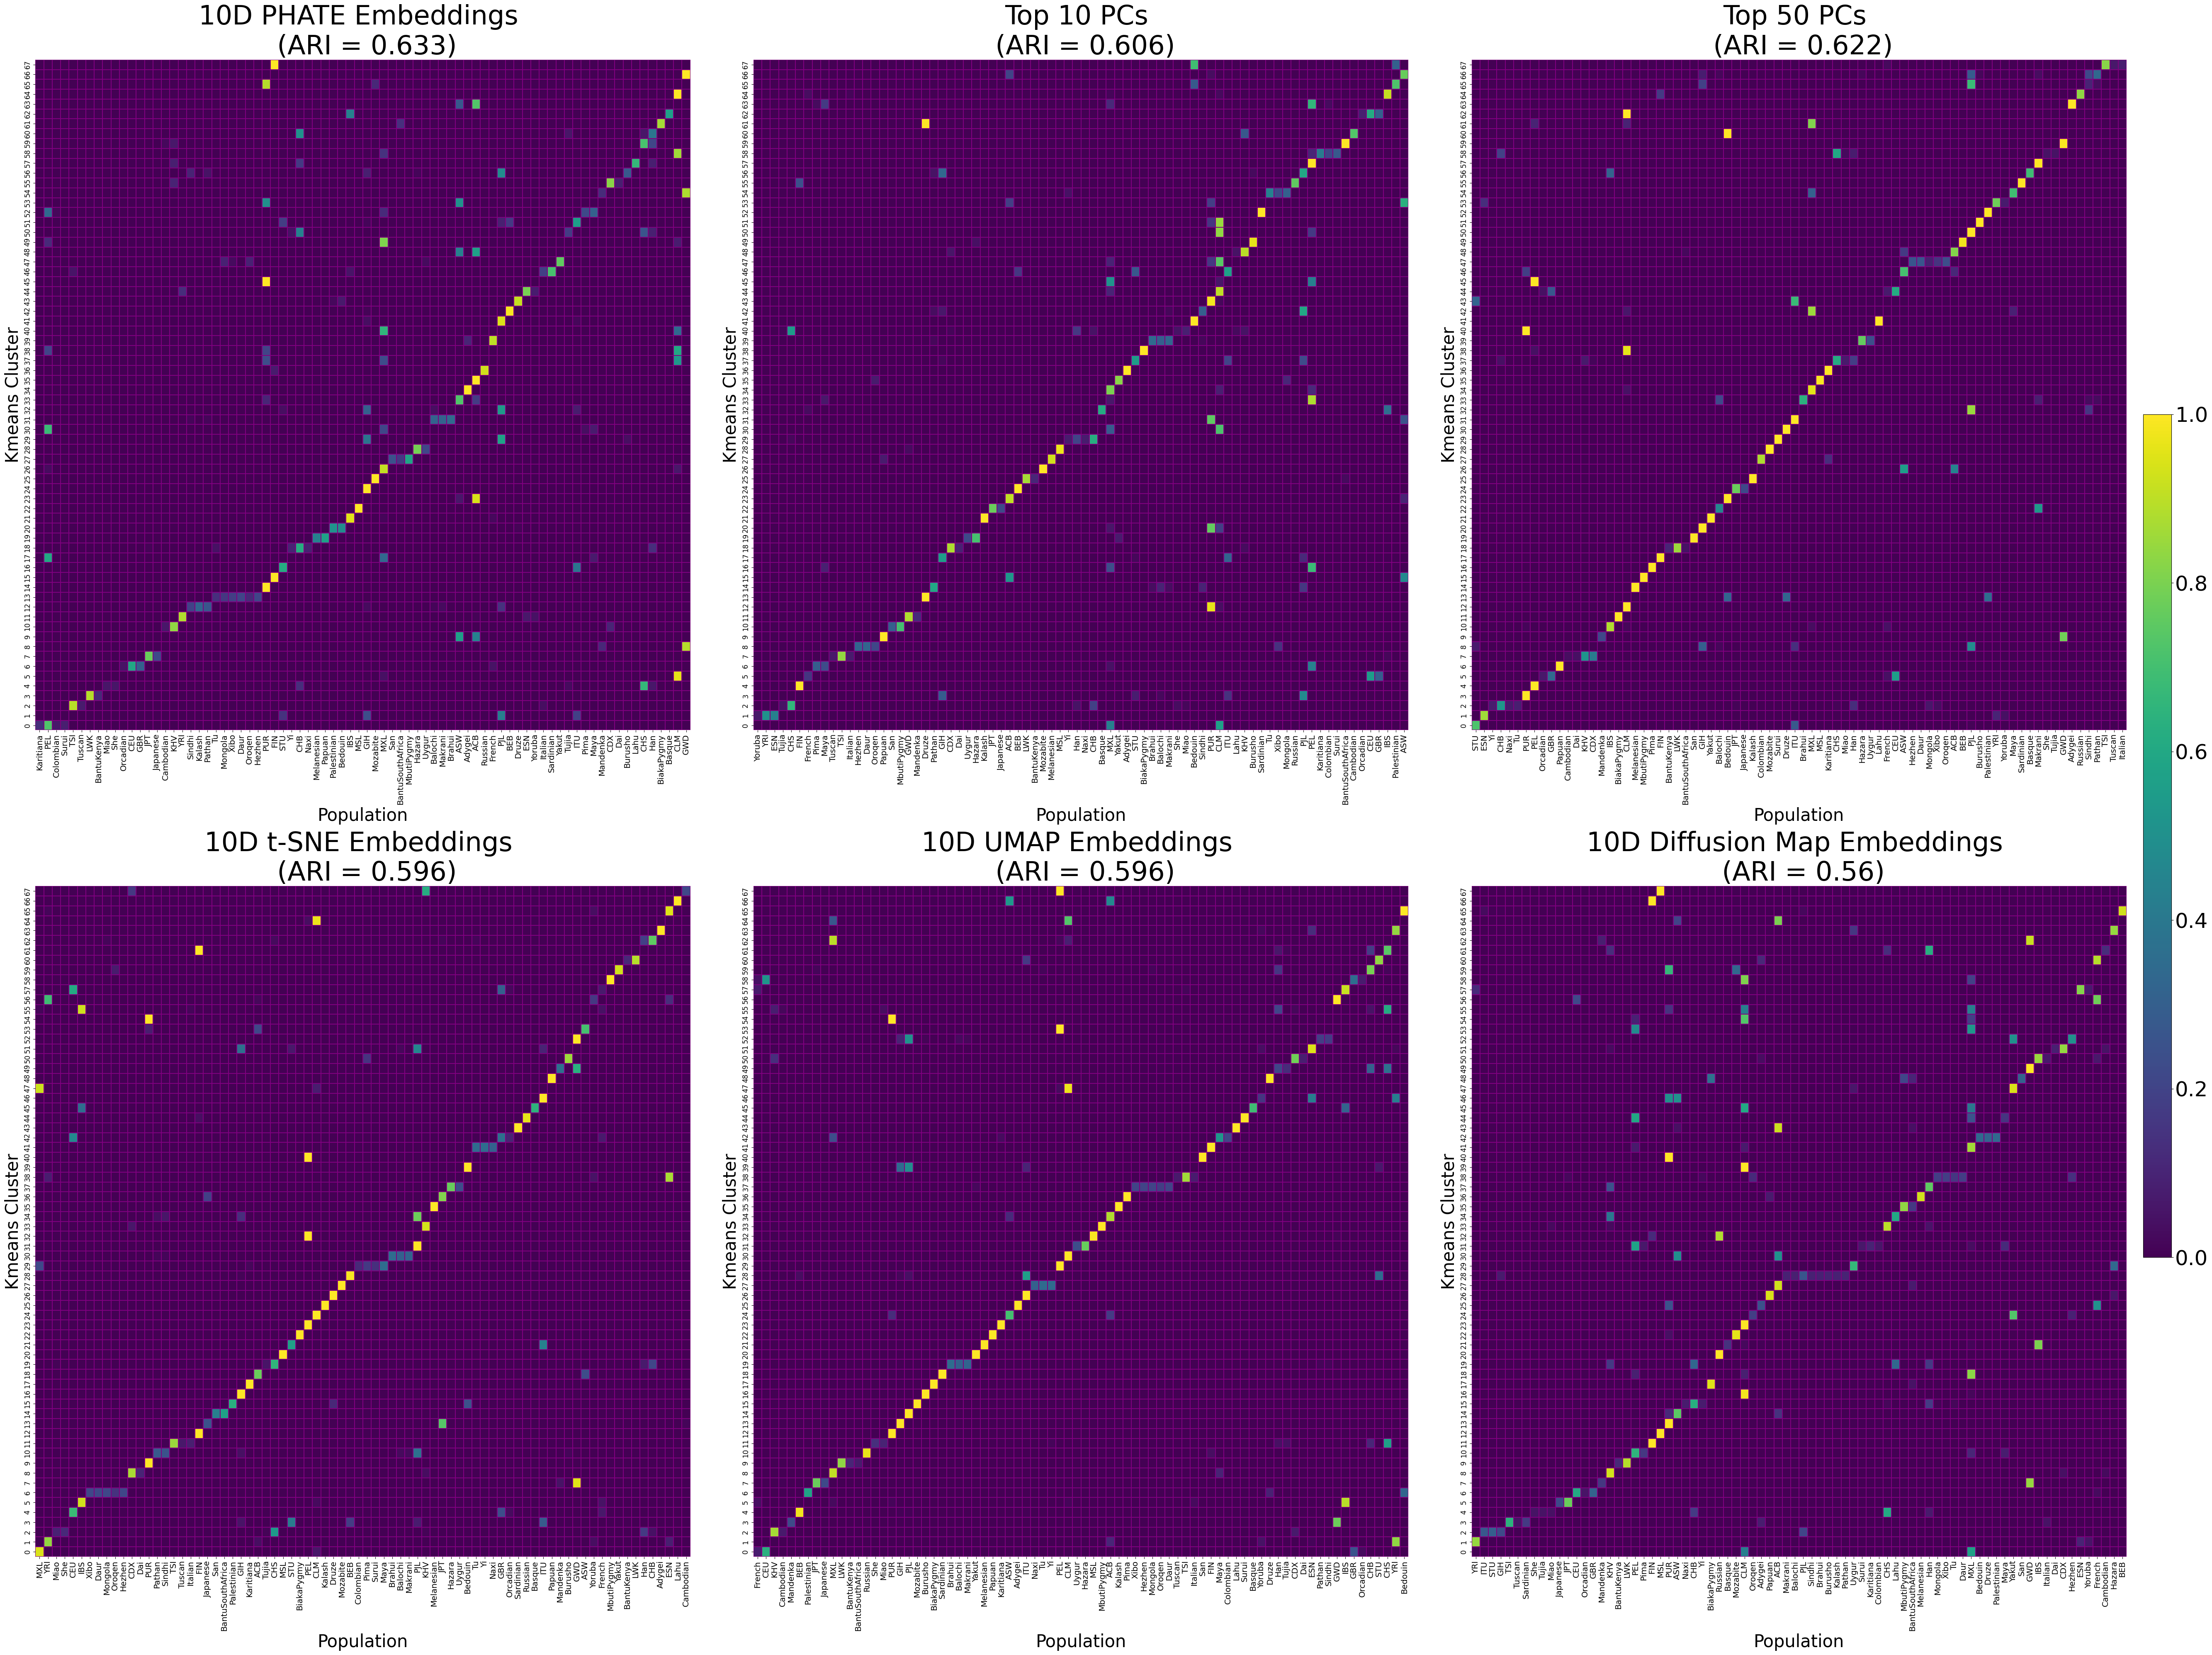

In [107]:
n_models = 6
nrows = 2
ncols = int(n_models/2)
fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=(20*ncols+6, 20*nrows))
ax = ax.flatten()
make_confusion_heatmap(label_pop, phate_clusterer_labels, ax=ax[0], colorbar=False, method = 'Kmeans', title='10D PHATE Embeddings')
make_confusion_heatmap(label_pop, pc10_clusterer_labels, ax=ax[1], colorbar=False, method = 'Kmeans', title='Top 10 PCs')
make_confusion_heatmap(label_pop, pc50_clusterer_labels, ax=ax[2], colorbar=False, method = 'Kmeans', title='Top 50 PCs')
make_confusion_heatmap(label_pop, tsne_clusterer_labels, ax=ax[3], colorbar=False, method = 'Kmeans', title='10D t-SNE Embeddings')
make_confusion_heatmap(label_pop, umap_clusterer_labels, ax=ax[4], colorbar=False, method = 'Kmeans', title='10D UMAP Embeddings')
heatmap5 = make_confusion_heatmap(label_pop, diffusion_clusterer_labels, ax=ax[5], colorbar=False, method = 'Kmeans', title='10D Diffusion Map Embeddings')

# Create a single colorbar for all subplots
cbar = fig.colorbar(heatmap5.collections[0], ax=ax, location='right', shrink=0.66, aspect=30, pad=0.05)
cbar.ax.tick_params(labelsize=36)

plt.tight_layout(rect=[0, 0, 0.78, 1])  # Adjust layout to make space for the colorbar
plt.savefig(Figure_PATH+'/HGDP_Kmeans_6methods_2.png', format='png', bbox_inches='tight', dpi=300)

# only plot PHATE heatmap

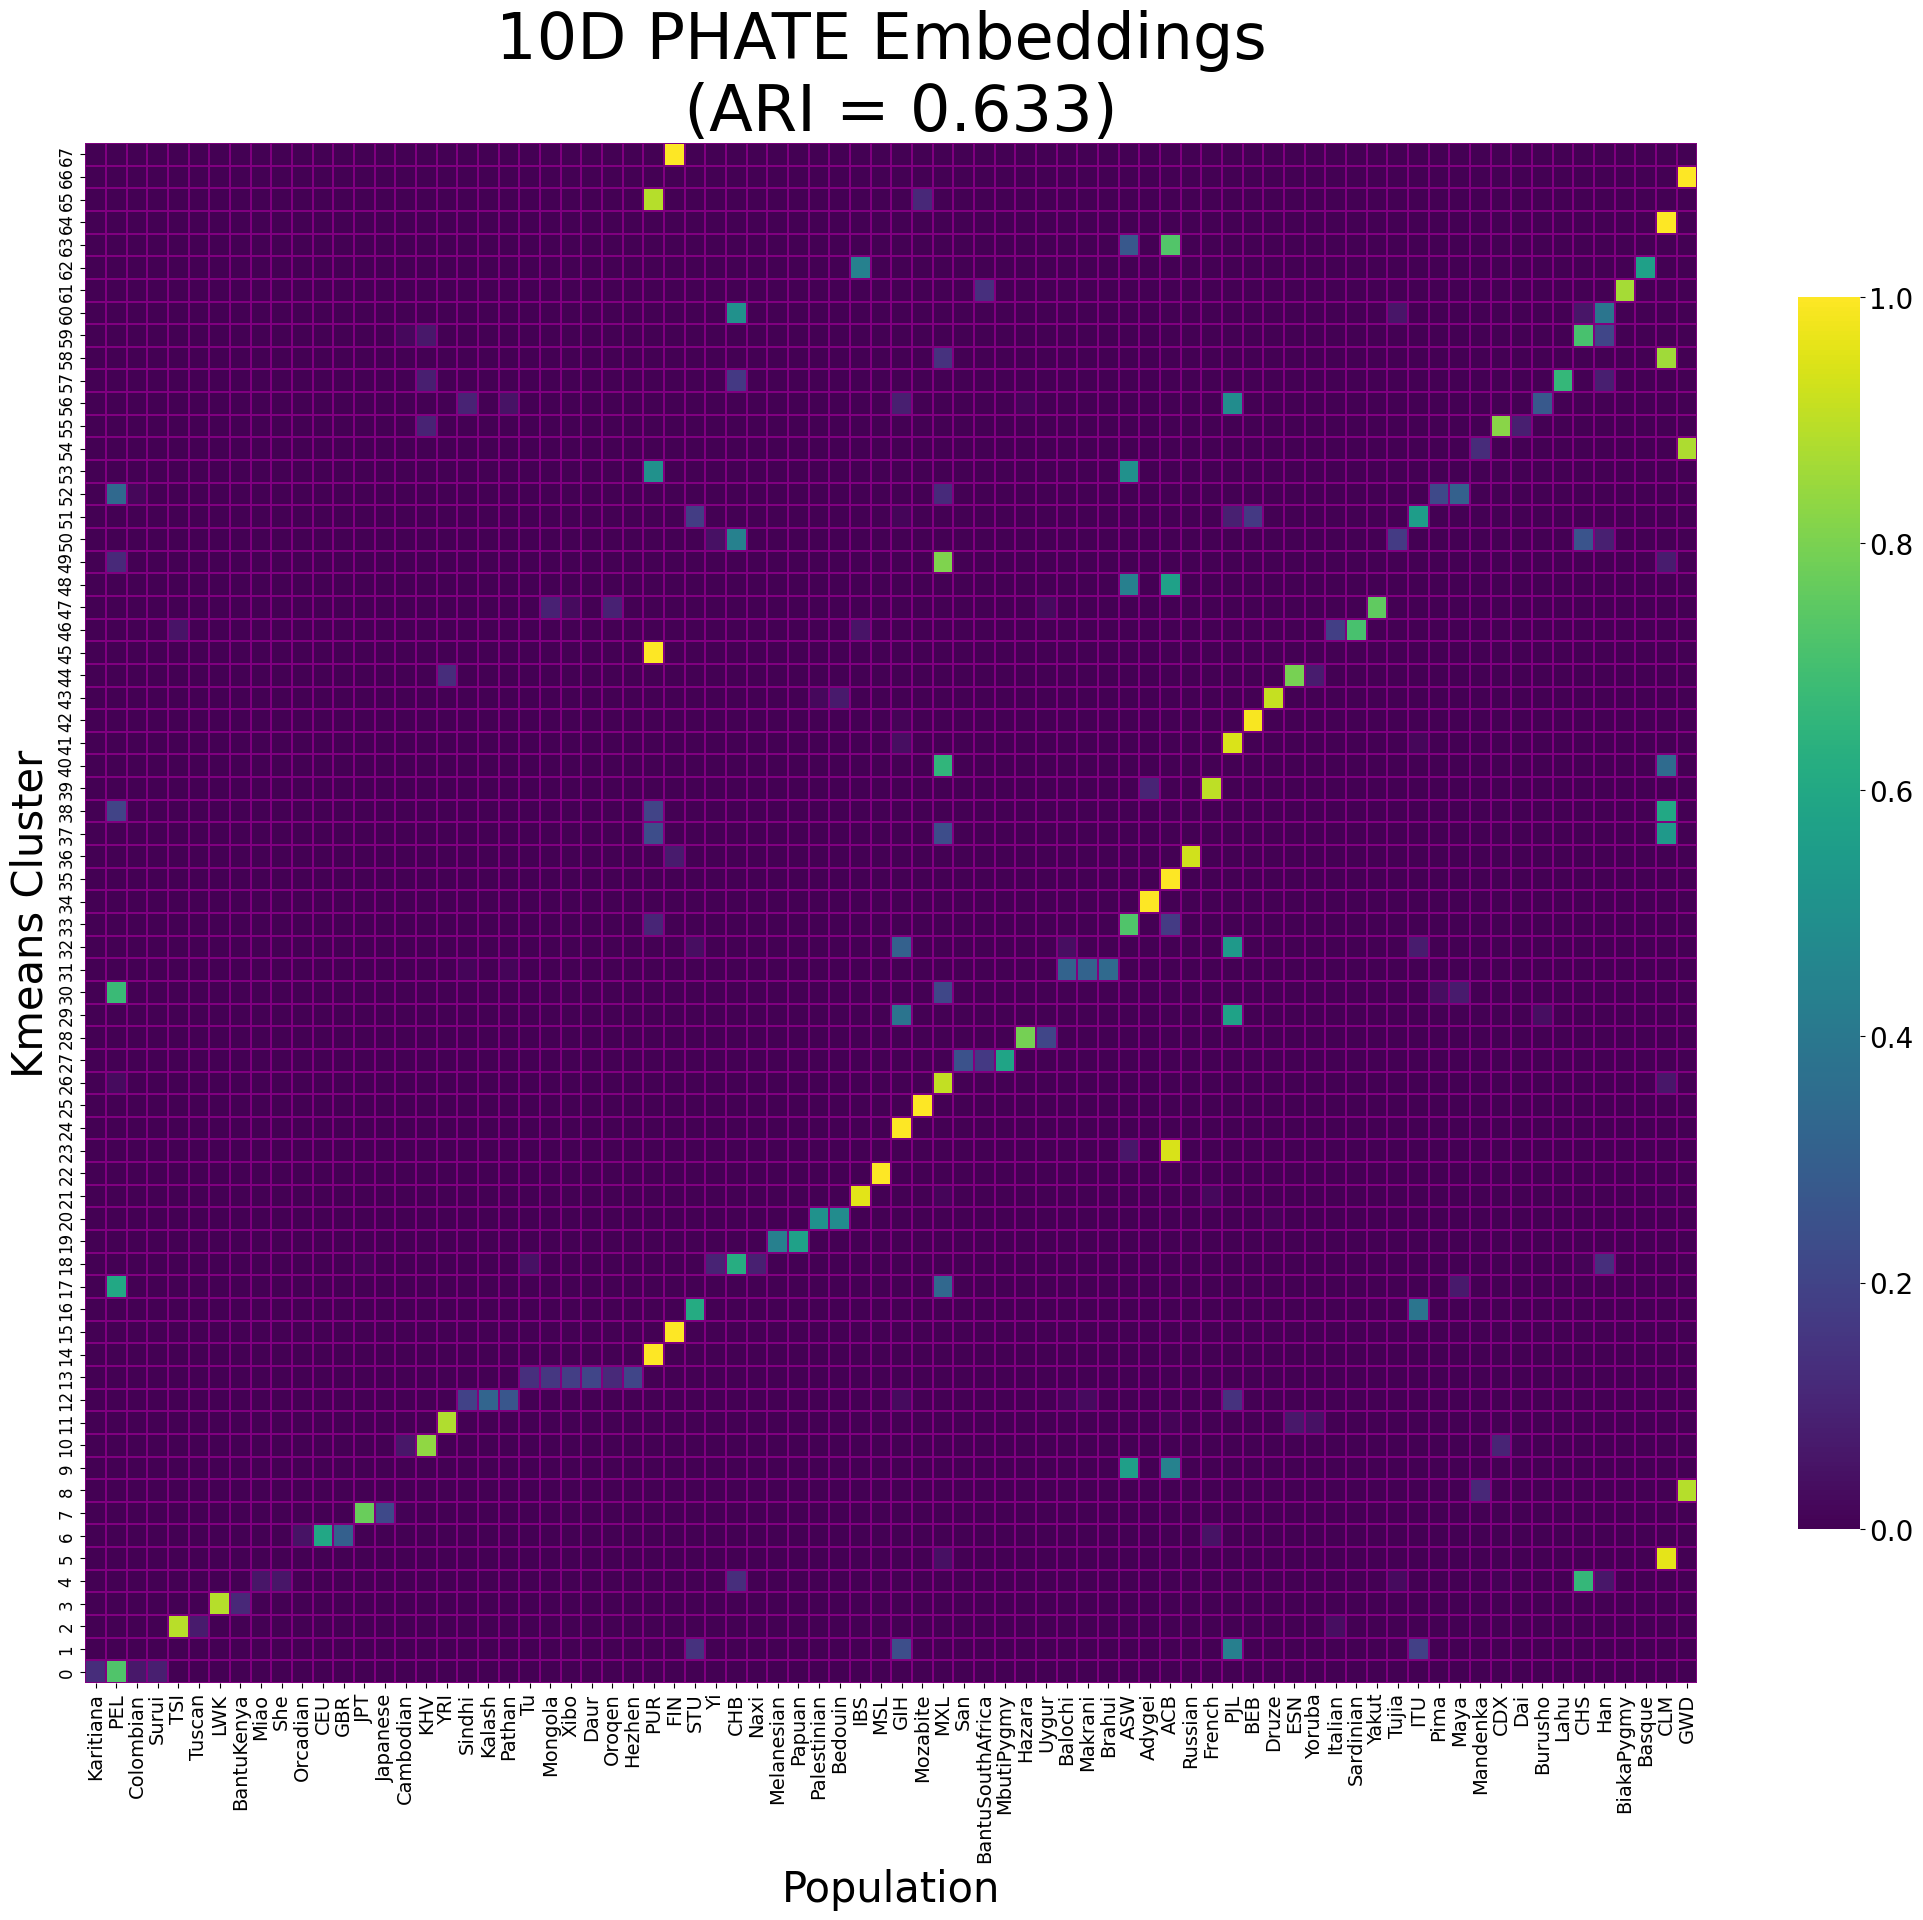

In [108]:
# create one heatmap
fig, ax = plt.subplots(figsize=(26, 20))
heatmap = make_confusion_heatmap(label_pop, phate_clusterer_labels, ax=ax, colorbar=True, method = 'Kmeans', title='10D PHATE Embeddings')
plt.savefig(Figure_PATH+'/HGDP_Kmeans_PHATE_2.png', format='png', bbox_inches='tight', dpi=300)